In [5]:
import os, math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_summary import DataFrameSummary
from pathlib import Path
import seaborn as sns

sns.set()
os.chdir('/home/krivas/projects/analysis-project/')
from src.utils import convert_int, convert_date

%matplotlib inline

In [6]:
DATA        = Path('data')
RAW         = DATA/'raw'
PROCESSED   = DATA/'processed'

# Leyendo data

In [7]:
%%time
csv = pd.read_excel(RAW/'HistoricoJob05.csv.xlsx')
for count in range(6, 8):
    csv = pd.concat([csv, pd.read_excel(RAW/f'HistoricoJob0{count}.csv.xlsx')])

CPU times: user 4min 23s, sys: 1.3 s, total: 4min 24s
Wall time: 4min 24s


In [8]:
csv.head()

,Id_HistoricoJob,Id_Job,Id_Malla,Fecha_Carga_Scheduler,Fecha_Ejec_Inicio,Fecha_Ejec_Fin,Duracion,Promedio,Agente,Mxrc,Maxcmpc,Grupo,Force_Complete,CCF,Estado
0,4559926,@E2SM299,02SM299F,2017-12-16 22:40:00,2017-12-16 22:40:00,2017-12-16 22:40:02,2,1M00,PNBYQTBNE92,0,0,SCHE01,NO,NO,COMPLETE
1,4559927,@E2SM299,02SM299F,2017-12-16 22:20:00,2017-12-16 22:20:00,2017-12-16 22:20:02,2,-,PNBYQTBNE92,0,0,SCHE01,NO,NO,COMPLETE
2,4559928,@E2SM299,02SM299F,2017-12-16 22:00:00,2017-12-16 22:00:01,2017-12-16 22:00:05,4,-,PNBYQTBNE92,0,0,SCHE01,NO,NO,COMPLETE
3,4559929,@E2SM299,02SM299F,2017-12-16 21:40:00,2017-12-16 21:40:00,2017-12-16 21:40:02,2,1M00,PNBYQTBNE92,0,0,SCHE01,NO,NO,COMPLETE
4,4559930,@E2SM299,02SM299F,2017-12-16 21:20:00,2017-12-16 21:20:00,2017-12-16 21:20:04,4,-,PNBYQTBNE92,0,0,SCHE01,NO,NO,COMPLETE


In [9]:
csv.shape

(3000000, 15)

In [10]:
csv.columns

Index(['Id_HistoricoJob', 'Id_Job', 'Id_Malla', 'Fecha_Carga_Scheduler',
       'Fecha_Ejec_Inicio', 'Fecha_Ejec_Fin', 'Duracion', 'Promedio', 'Agente',
       'Mxrc', 'Maxcmpc', 'Grupo', 'Force_Complete', 'CCF', 'Estado'],
      dtype='object')

# Generalidades

- Se verificara que las mallas tengan una fecha de inicio

In [58]:
csv = csv.sort_values(['Fecha_Ejec_Inicio'])

In [59]:
# Some Ids don't have start date
csv.groupby(['Fecha_Ejec_Inicio', 'Id_Malla']).count().head()

Id_HistoricoJob  Id_Job  Fecha_Carga_Scheduler  \
Fecha_Ejec_Inicio   Id_Malla                                                   
2017-12-15 14:55:01 T2DKAIH2                2       2                      2   
2017-12-15 14:55:02 T2DFCAI2               18      18                     18   
2017-12-15 14:55:03 02DNIHH2                1       1                      1   
                    T0EKH993                1       1                      1   
                    T2DAEII2                1       1                      1   

                              Fecha_Ejec_Fin  Duracion  Promedio  Agente  \
Fecha_Ejec_Inicio   Id_Malla                                               
2017-12-15 14:55:01 T2DKAIH2               2         2         2       0   
2017-12-15 14:55:02 T2DFCAI2              18        18        18       0   
2017-12-15 14:55:03 02DNIHH2               1         1         1       0   
                    T0EKH993               1         1         1       0   
                    T2DAEII2               1         1         1       0   

                              Mxrc  Maxcmpc  Grupo  Force_Complete  CCF  \
Fecha_Ejec_Inicio   Id_Malla                                              
2017-12-15 14:55:01 T2DKAIH2     2        2      2               2    2   
2017-12-15 14:55:02 T2DFCAI2    18       18     18              18   18   
2017-12-15 14:55:03 02DNIHH2     1        1      1               1    1   
                    T0EKH993     1        1      1               1    1   
                    T2DAEII2     1        1      1               1    1   

                              Estado  
Fecha_Ejec_Inicio   Id_Malla          
2017-12-15 14:55:01 T2DKAIH2       2  
2017-12-15 14:55:02 T2DFCAI2      18  
2017-12-15 14:55:03 02DNIHH2       1  
                    T0EKH993       1  
                    T2DAEII2       1

- Se aprecia que la columna Id_HistoricoJob corresponde a un index de la tabla por lo que se podria eliminar

In [60]:
# Row id
len(csv.Id_HistoricoJob.unique())

3000000

- Se desea ver cuantas columnas existen por cada grupo

In [61]:
csv.Grupo.unique()

array(['BBSCHP   ', 'SCHE01   ', 'SCHDFLT  '], dtype=object)

In [62]:
csv.groupby(['Grupo']).count()

,Id_HistoricoJob,Id_Job,Id_Malla,Fecha_Carga_Scheduler,Fecha_Ejec_Inicio,Fecha_Ejec_Fin,Duracion,Promedio,Agente,Mxrc,Maxcmpc,Force_Complete,CCF,Estado
Grupo,,,,,,,,,,,,,,
BBSCHP,234479,234479,234479,234479,234473,234328,234479,234479,2209,234479,234479,234479,234479,234479
SCHDFLT,295,295,295,295,294,294,295,295,0,295,295,295,295,295
SCHE01,2765226,2765226,2765226,2765226,2765138,2764801,2765226,2765226,1445729,2765226,2765226,2765226,2765226,2765226


- Debido a que las columnas de duracion, promedio y las relacionadas a fechas son del tipo object se realizara un pequeño pre procesamiento sobre estas columnas para generar numeros enteros y facilitar el analisis

In [11]:
csv['Duracion'] = csv['Duracion'].astype(str)
csv['Promedio'] = csv['Promedio'].astype(str)
csv['Fecha_Ejec_Inicio'] = csv['Fecha_Ejec_Inicio'].astype(str)
csv['Fecha_Ejec_Fin'] = csv['Fecha_Ejec_Fin'].astype(str)
csv['Fecha_Carga_Scheduler'] = csv['Fecha_Carga_Scheduler'].astype(str)

In [12]:
%%time
csv['duracion_int'] = csv.apply(lambda row: convert_int(row, 'Duracion'), axis=1) 

CPU times: user 1min 25s, sys: 588 ms, total: 1min 26s
Wall time: 1min 26s


In [13]:
%%time
csv['promedio_int'] = csv.apply(lambda row: convert_int(row, 'Promedio'), axis=1) 

CPU times: user 1min 12s, sys: 412 ms, total: 1min 12s
Wall time: 1min 12s


In [14]:
%%time
csv[['Fecha_Ejec_Inicio_Int', 'Hora_Ejec_Inicio_Int']] = csv.apply(lambda row: convert_date(row, 'Fecha_Ejec_Inicio'), axis=1)

CPU times: user 7min 14s, sys: 3.21 s, total: 7min 17s
Wall time: 7min 17s


In [15]:
%%time
csv[['Fecha_Ejec_Fin_Int', 'Hora_Ejec_Fin_Int']] = csv.apply(lambda row: convert_date(row, 'Fecha_Ejec_Fin'), axis=1)

CPU times: user 7min 5s, sys: 3.16 s, total: 7min 9s
Wall time: 7min 9s


# Nulos en columnas

Luego de realizada la conversion se eliminaran 3 columnas:

In [68]:
csv.drop(['Id_HistoricoJob', 'Duracion', 'Promedio'], axis=1, inplace=True)

In [69]:
csv.reset_index(drop=True, inplace=True)
csv.head()

,Id_Job,Id_Malla,Fecha_Carga_Scheduler,Fecha_Ejec_Inicio,Fecha_Ejec_Fin,Agente,Mxrc,Maxcmpc,Grupo,Force_Complete,CCF,Estado,duracion_int,promedio_int,Fecha_Ejec_Inicio_Int,Hora_Ejec_Inicio_Int,Fecha_Ejec_Fin_Int,Hora_Ejec_Fin_Int
0,JD5BA914,T2DKAIH2,2017-12-15 14:55:00,2017-12-15 14:55:01,2017-12-16 13:00:02,NaN,0,0,BBSCHP,YES,NO,COMPLETE,79500.0,88140.0,20171215.0,53701.0,20171216.0,46802.0
1,JD5BA932,T2DKAIH2,2017-12-15 14:55:00,2017-12-15 14:55:01,2017-12-16 13:00:02,NaN,0,0,BBSCHP,YES,NO,COMPLETE,79500.0,88140.0,20171215.0,53701.0,20171216.0,46802.0
2,JD5FKF29,T2DFCAI2,2017-12-15 14:55:00,2017-12-15 14:55:02,2017-12-16 13:00:01,NaN,0,0,BBSCHP,YES,NO,COMPLETE,79440.0,88140.0,20171215.0,53702.0,20171216.0,46801.0
3,JD5HR924,T2DFCAI2,2017-12-15 14:55:00,2017-12-15 14:55:02,2017-12-16 13:00:02,NaN,0,0,BBSCHP,YES,NO,COMPLETE,79440.0,88140.0,20171215.0,53702.0,20171216.0,46802.0
4,JD5HR922,T2DFCAI2,2017-12-15 14:55:00,2017-12-15 14:55:02,2017-12-16 13:00:02,NaN,0,0,BBSCHP,YES,NO,COMPLETE,79440.0,88140.0,20171215.0,53702.0,20171216.0,46802.0


- Una vez realizado este pequeño pre procesamiento se pueden observar la cantidad de nulos que hay por columna

In [70]:
# Percentage of nulls 
csv.isnull().sum()

Id_Job                         0
Id_Malla                       0
Fecha_Carga_Scheduler          0
Fecha_Ejec_Inicio              0
Fecha_Ejec_Fin                 0
Agente                   1552062
Mxrc                           0
Maxcmpc                        0
Grupo                          0
Force_Complete                 0
CCF                            0
Estado                         0
duracion_int                  95
promedio_int              712370
Fecha_Ejec_Inicio_Int         95
Hora_Ejec_Inicio_Int          95
Fecha_Ejec_Fin_Int           577
Hora_Ejec_Fin_Int            577
dtype: int64

In [71]:
# Percentage of nulls 
100 * csv.isnull().sum() / csv.count().max()

Id_Job                    0.000000
Id_Malla                  0.000000
Fecha_Carga_Scheduler     0.000000
Fecha_Ejec_Inicio         0.000000
Fecha_Ejec_Fin            0.000000
Agente                   51.735400
Mxrc                      0.000000
Maxcmpc                   0.000000
Grupo                     0.000000
Force_Complete            0.000000
CCF                       0.000000
Estado                    0.000000
duracion_int              0.003167
promedio_int             23.745667
Fecha_Ejec_Inicio_Int     0.003167
Hora_Ejec_Inicio_Int      0.003167
Fecha_Ejec_Fin_Int        0.019233
Hora_Ejec_Fin_Int         0.019233
dtype: float64

# Columnas categoricas

In [16]:
cat_columns = ['Agente', 'Mxrc', 'Maxcmpc', 'Grupo', 'Force_Complete', 'CCF', 'Estado']
id_columns = ['Id_Job', 'Id_Malla']
for column in cat_columns:
    csv[column] = csv[column].astype('category').cat.codes

In [17]:
csv.head()

,Id_HistoricoJob,Id_Job,Id_Malla,Fecha_Carga_Scheduler,Fecha_Ejec_Inicio,Fecha_Ejec_Fin,Duracion,Promedio,Agente,Mxrc,...,Grupo,Force_Complete,CCF,Estado,duracion_int,promedio_int,Fecha_Ejec_Inicio_Int,Hora_Ejec_Inicio_Int,Fecha_Ejec_Fin_Int,Hora_Ejec_Fin_Int
0,4559926,@E2SM299,02SM299F,2017-12-16 22:40:00,2017-12-16 22:40:00,2017-12-16 22:40:02,2,1M00,77,0,...,2,0,0,0,2.0,60.0,20171216.0,81600.0,20171216.0,81602.0
1,4559927,@E2SM299,02SM299F,2017-12-16 22:20:00,2017-12-16 22:20:00,2017-12-16 22:20:02,2,-,77,0,...,2,0,0,0,2.0,NaN,20171216.0,80400.0,20171216.0,80402.0
2,4559928,@E2SM299,02SM299F,2017-12-16 22:00:00,2017-12-16 22:00:01,2017-12-16 22:00:05,4,-,77,0,...,2,0,0,0,4.0,NaN,20171216.0,79201.0,20171216.0,79205.0
3,4559929,@E2SM299,02SM299F,2017-12-16 21:40:00,2017-12-16 21:40:00,2017-12-16 21:40:02,2,1M00,77,0,...,2,0,0,0,2.0,60.0,20171216.0,78000.0,20171216.0,78002.0
4,4559930,@E2SM299,02SM299F,2017-12-16 21:20:00,2017-12-16 21:20:00,2017-12-16 21:20:04,4,-,77,0,...,2,0,0,0,4.0,NaN,20171216.0,76800.0,20171216.0,76804.0


# Analisis de Jobs

- Se observara la cantidad de ejecuciones de un job para una malla en un solo dia

In [74]:
temp = csv.groupby(['Id_Job', 'Id_Malla', 'Fecha_Ejec_Inicio_Int']).count().reset_index().sort_values('Agente', ascending=False).reset_index()
temp.loc[temp.Agente >= 10].shape, temp.loc[temp.Agente >= 2].shape, temp.loc[temp.Agente == 1].shape 

((13790, 19), (83061, 19), (2038704, 19))

In [179]:
temp.loc[temp.Agente <=10].head(20)

,index,Id_Job,Id_Malla,Fecha_Ejec_Inicio_Int,Fecha_Carga_Scheduler,Fecha_Ejec_Inicio,Fecha_Ejec_Fin,Agente,Mxrc,Maxcmpc,Grupo,Force_Complete,CCF,Estado,duracion_int,promedio_int,Hora_Ejec_Inicio_Int,Fecha_Ejec_Fin_Int,Hora_Ejec_Fin_Int
2005,13878,@E2FEM91,04FEHBQ0,20170806.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2006,13891,@E2FEM91,04FEHBQ0,20170820.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2007,13870,@E2FEM91,04FEHBQ0,20170729.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2008,13871,@E2FEM91,04FEHBQ0,20170730.0,10,10,10,10,10,10,10,10,10,10,10,0,10,10,10
2009,13905,@E2FEM91,04FEHBQ0,20170903.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2010,13898,@E2FEM91,04FEHBQ0,20170827.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2011,13911,@E2FEM91,04FEHBQ0,20170910.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2012,14700,@E2FEV91,04FEHBQ0,20170903.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2013,13059,@E2FEH91,04FEHBQ0,20170806.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2014,14706,@E2FEV91,04FEHBQ0,20170910.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [168]:
def print_some_information(df, id_malla, id_job, start_date):
    temp = df.loc[(df.Id_Malla == id_malla) & (df.Id_Job == id_job) & (df.Fecha_Ejec_Inicio_Int == start_date)]
    print(f'informacion for: {id_malla} {id_job} {start_date}')
    print(temp.duracion_int.max())
    print(temp.duracion_int.min())
    print(temp.duracion_int.mean())    
    print(temp.duracion_int.median())

In [177]:
print_some_information(csv, '04FEHBQ0', '@E2FEV91', 20170729)
print_some_information(csv, '04FEHBQ0', '@E2FEV91', 20170814)

informacion for: 04FEHBQ0 @E2FEV91 20170729
4.0
1.0
2.1
2.0
informacion for: 04FEHBQ0 @E2FEV91 20170814
434.0
3.0
309.1
387.5


In [165]:
print_some_information(csv, '02IF993F', '@E2IF994', 20170912)
print_some_information(csv, '02IF993F', '@E2IF994', 20170913)
print_some_information(csv, '02IF993F', '@E2IF994', 20170905)
print_some_information(csv, '02IF993F', '@E2IF994', 20170914)

informacion for: 02IF993F @E2IF994 20170912
1.0
0.0
0.11232876712328767
informacion for: 02IF993F @E2IF994 20170913
1.0
0.0
0.07945205479452055
informacion for: 02IF993F @E2IF994 20170905
1.0
0.0
0.10410958904109589
informacion for: 02IF993F @E2IF994 20170914
1.0
0.0
0.05458515283842795


In [171]:
print_some_information(csv, '02VAK69F', '@E2VAK69', 20170908)
print_some_information(csv, '02RBFC6F', '@E2RF996', 20170906)
print_some_information(csv, '02RBFC6F', '@E2RF996', 20170904)

informacion for: 02VAK69F @E2VAK69 20170908
784.0
9.0
95.10238907849829
22.0
informacion for: 02RBFC6F @E2RF996 20170906
1.0
0.0
0.06484641638225255
0.0
informacion for: 02RBFC6F @E2RF996 20170904
1.0
0.0
0.05460750853242321
0.0


- Los Jobs que superan las 230 ejecuciones por dia son en mayoria jobs que tienen una duracion de 1seg como maximo
- Existen jobs que  tienen una duracion maxima muy grande en relacion con su tiempo minimo de ejecucion

In [184]:
csv.Estado.value_counts()

COMPLETE     542029
ENDED        457786
STARTED         175
INPUT            10
Name: Estado, dtype: int64

In [189]:
csv[csv.Mxrc != 0].shape

(9247, 18)

In [190]:
csv[csv.Mxrc == 0].shape

(990753, 18)

- Luego se observara el comportamiento de los jobs en determinadas horas del dia

In [18]:
id_date = 20180401
id_job = '@E2EC969'
id_malla = '02ECLV92'

In [19]:
csv.loc[(csv.Fecha_Ejec_Inicio_Int == id_date)].shape

(10849, 21)

In [20]:
csv.loc[(csv.Fecha_Ejec_Inicio_Int == id_date) & (csv.Hora_Ejec_Inicio_Int < 21600)].shape

(4544, 21)

In [21]:
csv.loc[(csv.Fecha_Ejec_Inicio_Int == id_date) \
        & (csv.Hora_Ejec_Inicio_Int >= 21600)\
       & (csv.Hora_Ejec_Inicio_Int < 43200)].shape

(1710, 21)

In [22]:
csv.loc[(csv.Fecha_Ejec_Inicio_Int == id_date) \
        & (csv.Hora_Ejec_Inicio_Int >= 43200)\
       & (csv.Hora_Ejec_Inicio_Int < 64800)].shape

(1526, 21)

In [23]:
csv.loc[(csv.Fecha_Ejec_Inicio_Int == id_date) \
        & (csv.Hora_Ejec_Inicio_Int >= 64800)\
      ].shape

(3069, 21)

- Se observa que para el horario de la tarde y noche se ejecutan jobs en el dia 20170726, ahora se vera si existe un mismo job que se ejecuta varias veces en un dia

In [24]:
csv[csv.Fecha_Ejec_Inicio_Int == id_date].groupby(['Id_Job']).count().reset_index().sort_values('Id_Malla', ascending=False).head()

,Id_Job,Id_HistoricoJob,Id_Malla,Fecha_Carga_Scheduler,Fecha_Ejec_Inicio,Fecha_Ejec_Fin,Duracion,Promedio,Agente,Mxrc,...,Grupo,Force_Complete,CCF,Estado,duracion_int,promedio_int,Fecha_Ejec_Inicio_Int,Hora_Ejec_Inicio_Int,Fecha_Ejec_Fin_Int,Hora_Ejec_Fin_Int
1412,@E2IF994,730,730,730,730,730,730,730,730,730,...,730,730,730,730,730,0,730,730,730,730
2919,@E2QD984,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,0,147,147,147,147
2918,@E2QD982,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,0,146,146,146,146
2838,@E2MQN92,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,0,146,146,146,146
2840,@E2MQN97,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146


In [25]:
csv.loc[(csv.Fecha_Ejec_Inicio_Int == id_date) \
        & (csv.Hora_Ejec_Inicio_Int >= 43200)\
       & (csv.Hora_Ejec_Inicio_Int < 64800)\
       & (csv.Id_Job == id_job)].shape

(7, 21)

In [26]:
csv.loc[(csv.Fecha_Ejec_Inicio_Int == id_date) \
        & (csv.Hora_Ejec_Inicio_Int >= 64800)\
        & (csv.Id_Job == id_job)].shape

(5, 21)

In [27]:
csv.loc[(csv.Fecha_Ejec_Inicio_Int == id_date) \
        & (csv.Hora_Ejec_Inicio_Int >= 64800)\
        & (csv.Id_Job == id_job)].groupby('Id_Job').mean().duracion_int, \
csv.loc[(csv.Fecha_Ejec_Inicio_Int == id_date) \
        & (csv.Hora_Ejec_Inicio_Int >= 64800)\
        & (csv.Id_Job == id_job)].groupby('Id_Job').median().duracion_int

(Id_Job
 @E2EC969    3.6
 Name: duracion_int, dtype: float64, Id_Job
 @E2EC969    4.0
 Name: duracion_int, dtype: float64)

In [28]:
csv.loc[(csv.Fecha_Ejec_Inicio_Int == 20170726) \
        & (csv.Hora_Ejec_Inicio_Int >= 43200)\
       & (csv.Hora_Ejec_Inicio_Int < 64800)\
        & (csv.Id_Job == id_job)].groupby('Id_Job').mean().duracion_int, \
csv.loc[(csv.Fecha_Ejec_Inicio_Int == 20170726) \
        & (csv.Hora_Ejec_Inicio_Int >= 43200)\
       & (csv.Hora_Ejec_Inicio_Int < 64800)\
        & (csv.Id_Job == id_job)].groupby('Id_Job').median().duracion_int

(Series([], Name: duracion_int, dtype: float64),
 Series([], Name: duracion_int, dtype: float64))

- Se observara si existe sobrecarga en los servidores y por eso algunas veces se ejecutan mas rapidos que otras veces

In [115]:
csv.groupby()

,Id_HistoricoJob,Id_Job,Id_Malla,Fecha_Carga_Scheduler,Fecha_Ejec_Inicio,Fecha_Ejec_Fin,Duracion,Promedio,Agente,Mxrc,...,Grupo,Force_Complete,CCF,Estado,duracion_int,promedio_int,Fecha_Ejec_Inicio_Int,Hora_Ejec_Inicio_Int,Fecha_Ejec_Fin_Int,Hora_Ejec_Fin_Int
0,4559926,@E2SM299,02SM299F,2017-12-16 22:40:00,2017-12-16 22:40:00,2017-12-16 22:40:02,2,1M00,77,0,...,2,0,0,0,2.0,60.0,20171216.0,81600.0,20171216.0,81602.0
1,4559927,@E2SM299,02SM299F,2017-12-16 22:20:00,2017-12-16 22:20:00,2017-12-16 22:20:02,2,-,77,0,...,2,0,0,0,2.0,NaN,20171216.0,80400.0,20171216.0,80402.0
2,4559928,@E2SM299,02SM299F,2017-12-16 22:00:00,2017-12-16 22:00:01,2017-12-16 22:00:05,4,-,77,0,...,2,0,0,0,4.0,NaN,20171216.0,79201.0,20171216.0,79205.0
3,4559929,@E2SM299,02SM299F,2017-12-16 21:40:00,2017-12-16 21:40:00,2017-12-16 21:40:02,2,1M00,77,0,...,2,0,0,0,2.0,60.0,20171216.0,78000.0,20171216.0,78002.0
4,4559930,@E2SM299,02SM299F,2017-12-16 21:20:00,2017-12-16 21:20:00,2017-12-16 21:20:04,4,-,77,0,...,2,0,0,0,4.0,NaN,20171216.0,76800.0,20171216.0,76804.0


In [159]:
id_date = 20180401
# id_job = '@E2EC969'
# id_malla = '02ECLV92'
id_job = '@E2FEV91'
id_malla = '04FEHBQ0'

In [148]:
csv[(csv.Id_Job == id_job) & (csv.Id_Malla == id_malla)].duracion_int.max()

793.0

In [149]:
csv[(csv.Id_Job == id_job) & (csv.Id_Malla == id_malla)].duracion_int.min()

1.0

In [29]:
csv[(csv.Id_Job == id_job) & (csv.Id_Malla == id_malla)].duracion_int.max()

894.0

In [30]:
csv[(csv.Id_Job == id_job) & (csv.Id_Malla == id_malla)].duracion_int.min()

2.0

In [166]:
from datetime import date, timedelta

day = int(id_date % 100)
month = int(int(id_date / 100) % 100)
year = int(id_date / 10000)
start_date = int((date(year, month, day) - timedelta(days=7*(2))).strftime('%Y%m%d'))
    
actual_date = id_date

temp_id = csv.loc[(csv['Fecha_Ejec_Inicio_Int'] >= start_date) &\
                        (csv['Fecha_Ejec_Inicio_Int'] < actual_date) &\
                        (csv['Mxrc'] == 0) &\
                        (csv['Id_Job'] == id_job)]



In [170]:
temp_id = temp_id.loc[temp_id['Fecha_Ejec_Inicio_Int'] == 20180322].reset_index()\
            [['Fecha_Ejec_Inicio_Int', 'Hora_Ejec_Inicio_Int', 'Hora_Ejec_Fin_Int', 'duracion_int']]

temp = csv.loc[(csv['Fecha_Ejec_Inicio_Int'] == 20180322) &\
       (csv['Hora_Ejec_Inicio_Int'] >= 3000) &\
       (csv['Hora_Ejec_Inicio_Int'] <= 80100)]\
            [['Fecha_Ejec_Inicio_Int', 'Id_Job', 'Hora_Ejec_Inicio_Int', 'Hora_Ejec_Fin_Int', 'duracion_int']]

In [171]:
temp_id

,Fecha_Ejec_Inicio_Int,Hora_Ejec_Inicio_Int,Hora_Ejec_Fin_Int,duracion_int
0,20180322.0,15278.0,15457.0,178.0
1,20180322.0,11143.0,11149.0,6.0
2,20180322.0,7538.0,7541.0,3.0
3,20180322.0,3932.0,3935.0,3.0
4,20180322.0,49432.0,49858.0,426.0
5,20180322.0,45159.0,45610.0,450.0
6,20180322.0,40894.0,41337.0,442.0
7,20180322.0,36635.0,37063.0,427.0
8,20180322.0,32374.0,32816.0,441.0
9,20180322.0,28159.0,28559.0,399.0


In [172]:
count_df = pd.DataFrame(list(range(3000, 80100)), columns=['time'])

In [173]:
def find_count_process(time, temp):
    return temp.loc[(temp['Hora_Ejec_Inicio_Int'] <= time) & (temp['Hora_Ejec_Fin_Int'] >= time)].shape[0]

In [174]:
count_df['count_process'] = count_df.apply(lambda row: find_count_process(row['time'], temp), axis=1)

In [175]:
def find_time_process(time, temp):
    s = temp.loc[(temp['Hora_Ejec_Inicio_Int'] <= time) & (temp['Hora_Ejec_Fin_Int'] >= time)].reset_index()
    if s.shape[0] > 0:
        return s.duracion_int[0]
    else:
        return np.nan


In [176]:
count_df['process_sec'] = count_df.apply(lambda row: find_time_process(row['time'], temp_id), axis=1)

In [177]:
def find_total_time(time, temp):
    return temp.loc[(temp['Hora_Ejec_Inicio_Int'] <= time) & (temp['Hora_Ejec_Fin_Int'] >= time)].duracion_int.sum()

In [178]:
count_df['process_total'] = count_df.apply(lambda row: find_total_time(row['time'], temp), axis=1)

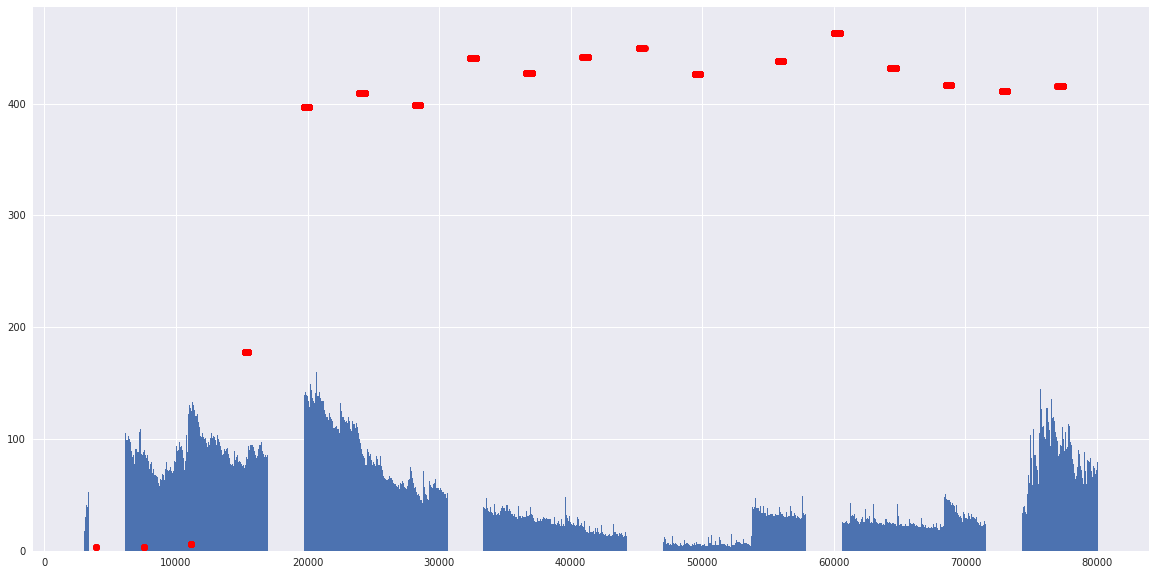

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
p1 = plt.bar(count_df.time, count_df.count_process, 0.8)
p2 = plt.plot(count_df.time, count_df.process_sec, 'ro')
plt.show()

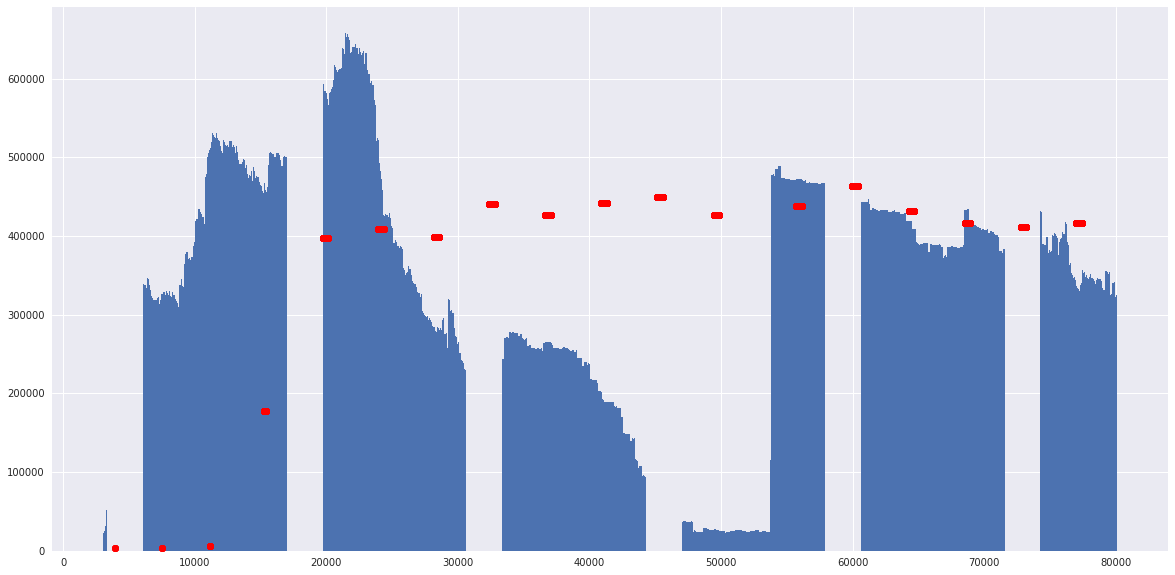

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
p1 = plt.bar(count_df.time, count_df.process_total, 0.8)
p2 = plt.plot(count_df.time, count_df.process_sec*1000, 'ro')
plt.show()

# Correlaciones

In [19]:
from sklearn.preprocessing import StandardScaler
# Scaling data over ordinal variables

sc = StandardScaler()
csv[['duracion_int', 'promedio_int']] = sc.fit_transform(csv[['duracion_int', 'promedio_int']])

In [20]:
csv.head()

,DiaSemanaEjecProgramada,TipoAgente,DiaSemanaEjecInicio,Force_Complete,Estado,EjecucionFeriado,duracion_int,promedio_int
0,1,1,1,1,0,0,2.974465,-0.28525
1,1,1,1,0,0,0,-0.228048,-0.28525
2,1,1,1,0,0,0,-0.133856,-0.28525
3,1,1,1,0,0,0,-0.329131,-0.28525
4,1,1,1,0,0,0,-0.276292,-0.28525


In [26]:
# Saving csv
csv.to_csv('processed_data.csv')

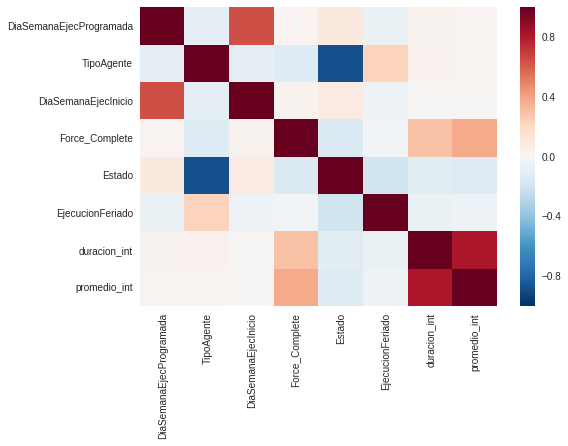

In [25]:
import seaborn as sns
corr = csv.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)